In [27]:
import Bio
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqUtils import nt_search as nt
from Bio.SeqUtils import MeltingTemp as mt
from Bio.SeqUtils import molecular_weight as mw
from collections import Counter
from matplotlib import pyplot as plt
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from Levenshtein import distance

In [3]:
content_a = SeqIO.read('./KY352407.fasta', 'fasta')
seqA = content_a.seq

content_b = SeqIO.read('./OQ297732.fasta', 'fasta')
seqB = content_b.seq

print(seqA)
print(seqB)

TAAAAGGATTAATCCTTCCCGGAAAATCCTACCAATCTCGATCTCTTGCAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTACTTGTCACTTGGCTGTATGCCCAGTGCATTTACGCAGTATAAATTATAATTTTTACTGTCGTTGACAGGAAACGAGTAACTCGTCCGTCTTCTGCAGGTTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCATACCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACTCACGTCCAACTCAGTTTACCTGTTTTACAGGTTAGCGACGTGCTAGTACGTGGATTTGGTGATACTGTTGAAGAAGCTATCACTGAAGCACGTCAACATTTAATAGATGGAACATGTGGCATTATCAGTCTCCAGAAGGGTGTTTTACCCCAACTGGAACAGCCTTATGTGTTCCTTAAACGTTCTGATGCCTTTACTGCACCTCATGGCCATGTTATGGTCGAGTTGGTCGCAGAATTAAATGGCATTCAGTACGGTAGGAGCGGAGAAACGCTTGGTGTCTTAGTGCCACACACGTATGAGACACCAACTGGTTACCGCAAGGTTCTTGTCCGTAAGAACGGTAATAAGGGTGCTGGTGGCCATTGCTACGGAGCCGATCTAAAGTCTCCAGACTTAGGTGACGAGCTTGGCACTGACCCTATTGAAGATTATGAAAACGACTGGAACACTAAACATGGCAGTGGACTCAAACGTCAGCTCTTTAGAGAGCTGAATGGTGGAGTTTACACTCGCTATGTAGACAACAACTTCTGTGGTCCTGATGGATATCCATTGGACTGTATTAAAGACTTGCTTGCTAGGGCCGGCAAATCTTGTGCTCCACTCTCTGACCAAATAGACTTTTTACAGTCTAAGAGAGGTGTGTACTGTTGCCGTGAGCATGAGCATGAAATAGCTTGGTTCACTGATCGCTCTGAGAAG

In [10]:
print(seqA.find('CGC'))
print(seqB.find('CGC'))

seqFind = Seq('CGC')
print(nt(str(seqA), seqFind))
print(nt(str(seqB), seqFind))

117
512
['CGC', 117, 525, 566, 613, 808, 988, 1153, 1302, 1410, 1450, 1542, 1815, 1906, 1953, 2223, 2359, 3036, 4069, 4327, 5349, 5589, 5843, 6216, 6491, 7363, 7444, 7527, 7531, 7619, 8279, 8308, 8313, 8641, 8743, 9091, 9186, 9215, 9218, 9357, 9700, 9725, 10671, 11175, 11367, 11524, 11786, 12105, 12401, 12871, 13279, 13812, 13842, 14469, 14621, 14879, 14958, 15213, 15456, 15533, 15812, 16321, 16400, 16994, 16996, 16998, 17098, 17104, 17299, 17316, 17593, 17595, 17648, 18346, 18507, 18759, 19562, 19656, 19754, 20091, 20165, 20244, 20749, 21729, 21773, 22481, 22577, 22627, 22779, 23283, 23291, 23996, 24038, 24181, 24284, 24536, 24580, 24790, 25403, 25873, 25980, 26135, 26485, 26504, 26543, 26616, 26698, 26775, 26854, 26895, 27689, 27691, 27698, 27703, 27785, 27822, 28103, 28122, 28176, 28206, 28253, 28472, 28574, 28808, 28968, 29120, 29131]
['CGC', 512, 651, 831, 1160, 1375, 1796, 2168, 2714, 3251, 3317, 3509, 4214, 4438, 4819, 8128, 8598, 8700, 8922, 8934, 9172, 9682, 10179, 10976, 1194

In [12]:
seqC = seqA[:6] + seqB[-9:]
seqC = seqC[::-1]

print(seqC)

GCCTATCGTGAAAAT


In [15]:
seqB = seqB.replace("Y","")
seqB = seqB.replace("N","")
seqB = seqB.replace("R","")
seqB = seqB.replace("W","")
seqB = seqB.replace("M","")
seqB = seqB.replace("S","")
seqB = seqB.replace("K","")

In [16]:
print(mt.Tm_Wallace(seqA))
print(mt.Tm_Wallace(seqB))
print(mt.Tm_Wallace(seqC))

81508.0
80772.0
42.0


In [18]:
def gc_content(seq):
    result = float(seq.count('G') + seq.count('C'))/len(seq)
    return result * 100

def at_content(seq):
    result = float(seq.count('A') + seq.count('T'))/len(seq)
    return result * 100

print(gc_content(seqA))
print(gc_content(seqB))
print(gc_content(seqC))
print(at_content(seqA))
print(at_content(seqB))
print(at_content(seqC))

39.21568627450981
39.0223752151463
40.0
60.78431372549019
60.9776247848537
60.0


In [21]:
print(mw(seqA))
print(mw(seqB))
print(mw(seqC))

9050161.841500323
8978271.984700456
4655.9837


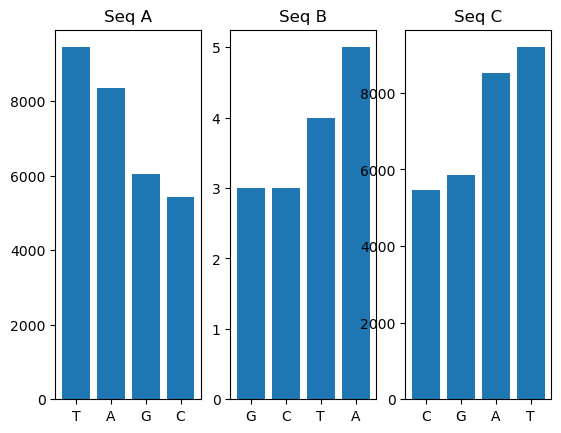

In [24]:
baseSeqA = Counter(seqA)
baseSeqC = Counter(seqB)
baseSeqB = Counter(seqC)

plt.subplot(1, 3, 1)
plt.bar(baseSeqA.keys(), baseSeqA.values())
plt.title('Seq A')
plt.subplot(1, 3, 2)
plt.bar(baseSeqB.keys(), baseSeqB.values())
plt.title('Seq B')
plt.subplot(1, 3, 3)
plt.bar(baseSeqC.keys(), baseSeqC.values())
plt.title('Seq C')
plt.show()

In [25]:
# 3 A
mRnaA = seqA.transcribe()
mRnaB = seqB.transcribe()
mRnaC = seqC.transcribe()

print(mRnaA)
print(mRnaB)
print(mRnaC)

UAAAAGGAUUAAUCCUUCCCGGAAAAUCCUACCAAUCUCGAUCUCUUGCAGAUCUGUUCUCUAAACGAACUUUAAAAUCUGUGUACUUGUCACUUGGCUGUAUGCCCAGUGCAUUUACGCAGUAUAAAUUAUAAUUUUUACUGUCGUUGACAGGAAACGAGUAACUCGUCCGUCUUCUGCAGGUUGCUUACGGUUUCGUCCGUGUUGCAGCCGAUCAUCAGCAUACCUAGGUUUCGUCCGGGUGUGACCGAAAGGUAAGAUGGAGAGCCUUGUCCCUGGUUUCAACGAGAAAACUCACGUCCAACUCAGUUUACCUGUUUUACAGGUUAGCGACGUGCUAGUACGUGGAUUUGGUGAUACUGUUGAAGAAGCUAUCACUGAAGCACGUCAACAUUUAAUAGAUGGAACAUGUGGCAUUAUCAGUCUCCAGAAGGGUGUUUUACCCCAACUGGAACAGCCUUAUGUGUUCCUUAAACGUUCUGAUGCCUUUACUGCACCUCAUGGCCAUGUUAUGGUCGAGUUGGUCGCAGAAUUAAAUGGCAUUCAGUACGGUAGGAGCGGAGAAACGCUUGGUGUCUUAGUGCCACACACGUAUGAGACACCAACUGGUUACCGCAAGGUUCUUGUCCGUAAGAACGGUAAUAAGGGUGCUGGUGGCCAUUGCUACGGAGCCGAUCUAAAGUCUCCAGACUUAGGUGACGAGCUUGGCACUGACCCUAUUGAAGAUUAUGAAAACGACUGGAACACUAAACAUGGCAGUGGACUCAAACGUCAGCUCUUUAGAGAGCUGAAUGGUGGAGUUUACACUCGCUAUGUAGACAACAACUUCUGUGGUCCUGAUGGAUAUCCAUUGGACUGUAUUAAAGACUUGCUUGCUAGGGCCGGCAAAUCUUGUGCUCCACUCUCUGACCAAAUAGACUUUUUACAGUCUAAGAGAGGUGUGUACUGUUGCCGUGAGCAUGAGCAUGAAAUAGCUUGGUUCACUGAUCGCUCUGAGAAG

In [26]:
# 3 B
aminoSeqA = mRnaA.translate()
aminoSeqB = mRnaB.translate()
aminoSeqC = mRnaC.translate()

print(aminoSeqA)
print(aminoSeqB)
print(aminoSeqC)

*KD*SFPENPTNLDLLQICSLNEL*NLCTCHLAVCPVHLRSINYNFYCR*QETSNSSVFCRLLTVSSVLQPIISIPRFRPGVTER*DGEPCPWFQRENSRPTQFTCFTG*RRASTWIW*YC*RSYH*STSTFNRWNMWHYQSPEGCFTPTGTALCVP*TF*CLYCTSWPCYGRVGRRIKWHSVR*ERRNAWCLSATHV*DTNWLPQGSCP*ER**GCWWPLLRSRSKVSRLR*RAWH*PY*RL*KRLEH*TWQWTQTSAL*RAEWWSLHSLCRQQLLWS*WISIGLY*RLAC*GRQILCSTL*PNRLFTV*ERCVLLP*A*A*NSLVH*SL*EEL*TANTL*HYQCR*V*FF*RRMS*IRFSSKL*NSGFTT*S*KEEDRRIYGSHSYCVSSCLTK*VQ*HAPVNLHEL*PLW*KFMADW*FPKGHM*AVWNSERCGRSSYNLWLST**CCC*NGMSCLPEPKNRTRPQCR*LPQSFRHYFSAPQGR*SVAFWWLCVFLCWLLQQVCILGT*SSR*HRIKPYRCGR*KY*DHE**PSSDFEPSMC*Y*HSWRFLSE*GSSNYSCFYVSIYKCIHRNC*KPRL*RL*NHC*ILW*LQSY*G*TQGWRLEHRF*QDFTHTSVWVFFTSCLRG*VNLLTHSGHSWSIHSSITDSRHDNIFRHF*SF*PFVRCYDQHSWTSH*QCHSYGICYWWLGSTS*EMASPVIGFYSRQP*ECLGLA*KSIAERRELP*GGLAHLAVSCHWRLHYCERPDSGC**RLVTFC*VFH*HC**GIRVVY*LYTVSWC*SSHNKFR*STYCSK*RFLPKMCAC*RTVTVTHAS*ST*RNNFLGR*YM*HIVNFRRSCY*NWHLRSY*LCT**HCKWSSRRNSCLCERSHAA*T*RARPVLCSHTSLIGY**CFYTQGWCTF*RCYLW*KHSCRSPRL*KCENHI*T**ACRQSPQREMFLIHCGDRYSIGGICMCCVRYSCENFTTYLRPFNTNGH*P**MECFNLLSL**VR*

c:\Users\timit\anaconda3\lib\site-packages\Bio\Seq.py:2804: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


In [28]:
# 4 A
seqFind = Seq('TGTACATTATAATGCTCTATTTTCTCGC')
local = pairwise2.align.localxx(seqA, seqFind, one_alignment_only=True)
print(format_alignment(*local))

In [ ]:
# 4 B
seqFind = Seq('CAGAGTAATGTGTACAGATATTGGGCTC')
local2 = pairwise2.align.localxx(seqA, seqFind, one_alignement_only=True)
print(format_alignment(*local2))